In [1]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

Reading in files:

In [3]:
Kep_ID, Pair_ID, Gal_Prob, Photo_Dist, Pair_Dist = np.loadtxt ('kolby-data.txt', usecols=(0,1,2,3,4), unpack=True)

In [4]:
print (Kep_ID)

[ 7090710.  7090515.  7659417. ...,  8653307.  8588807.  8588660.]


In [5]:
print (Pair_ID)

[    68.     68.     85. ...,  35228.  35247.  35247.]


In [6]:
print (Gal_Prob)

[ 0.003  0.003  0.    ...,  0.025  0.003  0.003]


In [7]:
print (Photo_Dist)

[ 1501.923    1219.7118    274.97043 ...,   373.87689   361.51929
   375.18808]


In [8]:
print (Pair_Dist)

[ 294.09899   294.09899    21.336109 ...,  268.53222   102.38771   102.38771 ]


Tried using np.loadtxt on 'kic_lflare.csv', but kept getting "Value Error: could not convert string to float"

Using np.genfromtxt seemed to work however:

In [9]:
row, Lfl_Lbol, giclr, kicnum = np.genfromtxt('kic_lflare.csv', delimiter = ',', unpack = True)

x=np.where((Lfl_Lbol < 1e-15))
Lfl_Lbol[x]=1e-15

In [10]:
print (row)

[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   2.07614000e+05
   2.07615000e+05   2.07616000e+05]


In [11]:
print (Lfl_Lbol)

[  1.00000000e-15   5.38317494e-04   1.00000000e-15 ...,   1.00000000e-15
   1.00000000e-15   1.00000000e-15]


In [12]:
print (giclr)

[ 0.265    -0.087     0.677999 ...,  0.623     0.622001  0.931   ]


In [13]:
print (kicnum)

[ 10000009.  10000056.  10000069. ...,   9999914.   9999949.   9999979.]


In [14]:
m = np.array(np.zeros(len(Kep_ID)), dtype='int')

for k in range (len(Kep_ID)):
    x = np.where((Kep_ID[k] == kicnum))
    m[k] = x[0]
#     Kep_ID == kicnum[x]
    
m
# in database speak, this a Join (Inner Join)
# Kep_ID == kicnum[m]


array([132675, 132661, 144449, ..., 172529, 170764, 170761])

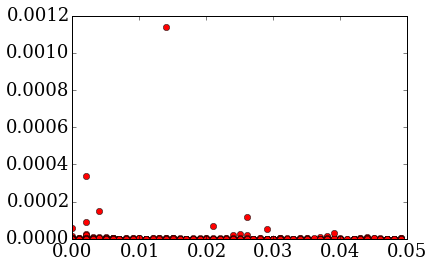

In [15]:
plt.plot(Gal_Prob, Lfl_Lbol[m], 'ro')

In [16]:
kicnum[m] == Kep_ID

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [17]:
len(Pair_ID)

1094

In [18]:
a = np.arange(0,1094,2)
b = np.arange(1,1094,2)

for j in range(0,len(a)):
    if giclr[m][a[j]] > giclr[m][b[j]]:
        tmp = a[j]
        a[j] = b[j]
        b[j] = tmp

In [19]:
len(a)

547

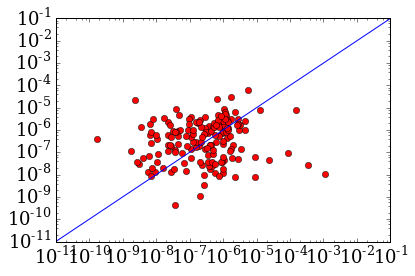

In [20]:
plt.plot(Lfl_Lbol[m][a],Lfl_Lbol[m][b], 'ro')
# plt.xlim(-.000001,.00002)
# plt.ylim(-.000001,.00002)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([0,1], [0,1])
plt.xscale('log')
plt.yscale('log')

In [21]:
AU_dist = Pair_Dist/3600.*np.pi/180. * Photo_Dist * 206265.
AU_cut = np.where(AU_dist < 120000)
print(np.mean(AU_dist[AU_cut]))

64088.9032584


In [22]:
Good_both_a = np.where((Lfl_Lbol[m][a]>1e-7)  & (Gal_Prob[a]>0.001))
Good_both_b = np.where((Lfl_Lbol[m][b]>1e-7)  & (Gal_Prob[b]>0.001))

Good_either = np.where(((Lfl_Lbol[m][a]>1e-7) | (Lfl_Lbol[m][b]>1e-7)) & 
                       ((Gal_Prob[a]>0.001) | (Gal_Prob[b]>0.001)))



In [58]:
Good_both_a2 = np.where((Lfl_Lbol[m][a]>1e-7)  & (Gal_Prob[a]>0.001) & (AU_dist[a] < 120000))
Good_both_b2 = np.where((Lfl_Lbol[m][b]>1e-7)  & (Gal_Prob[b]>0.001) & (AU_dist[b] < 120000))

Good_either2 = np.where(((Lfl_Lbol[m][a] > 1e-7) | (Lfl_Lbol[m][b] > 1e-7)) & 
                        ((Lfl_Lbol[m][a] > 1e-15) & (Lfl_Lbol[m][b] > 1e-15)) &
                        (Gal_Prob[a] > 0.001) & 
                        (AU_dist[a] < 120000))
print(np.size(Good_either2))

67


In [59]:
Lfl_Lbol[m][b][Good_either2]

array([  7.66363461e-07,   2.02316408e-07,   1.48591206e-07,
         3.07120079e-06,   1.97574115e-09,   8.29187279e-06,
         4.49047503e-07,   9.41127402e-07,   1.63584247e-03,
         1.11982112e-08,   2.52235864e-08,   4.55672837e-08,
         7.62811210e-08,   3.42972637e-07,   2.56345047e-08,
         2.61715363e-07,   2.67854613e-06,   1.26117778e-09,
         7.13975530e-07,   3.94585707e-09,   1.86047028e-06,
         1.45485934e-06,   1.23273562e-07,   7.55244169e-07,
         4.84684462e-07,   5.41316965e-08,   3.13701505e-06,
         1.15174135e-07,   8.31729353e-07,   5.81593951e-07,
         5.81593951e-07,   7.97477355e-07,   8.83815073e-08,
         3.16751844e-06,   4.17446942e-07,   1.35753013e-07,
         9.30931176e-07,   1.66368361e-05,   3.04984496e-07,
         6.65505133e-07,   6.54249725e-07,   1.79519176e-06,
         9.54940147e-07,   1.33704352e-06,   3.20923902e-08,
         1.54290905e-07,   4.13244859e-07,   2.01293807e-08,
         2.75710772e-06,

In [60]:
print(len(Lfl_Lbol[m][a][Good_both_a]))
print(len(Lfl_Lbol[m][b][Good_both_b]))
print(len(Lfl_Lbol[m][a][Good_both_a2]))
print(len(Lfl_Lbol[m][b][Good_both_b2]))


166
197
83
90


In [61]:
print(len(Lfl_Lbol[m][a][Good_either]))
print(len(Lfl_Lbol[m][b][Good_either]))
print(len(Lfl_Lbol[m][a][Good_either2]))
print(len(Lfl_Lbol[m][b][Good_either2]))

290
290
67
67


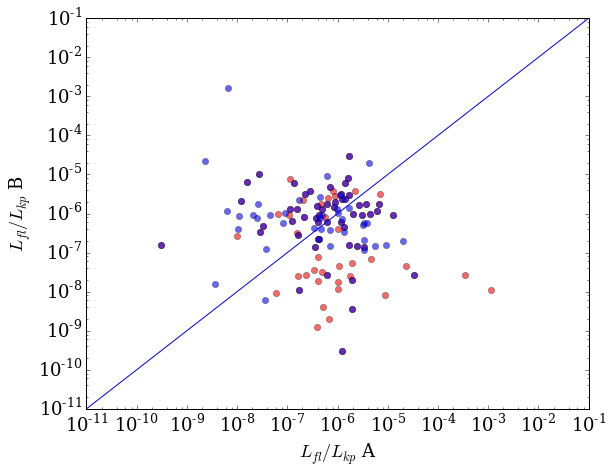

In [62]:
plt.figure(figsize=(9,7))
plt.plot(Lfl_Lbol[m][a][Good_both_a], Lfl_Lbol[m][b][Good_both_a], 'ro', alpha = 0.6)
plt.plot(Lfl_Lbol[m][a][Good_both_b], Lfl_Lbol[m][b][Good_both_b], 'bo', alpha = 0.6)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([1e-11,1], [1e-11,1])
# plt.plot([1e-11,1]*2, [1e-11,1]*2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$L_{fl}/L_{kp}$ A')
plt.ylabel('$L_{fl}/L_{kp}$ B')

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


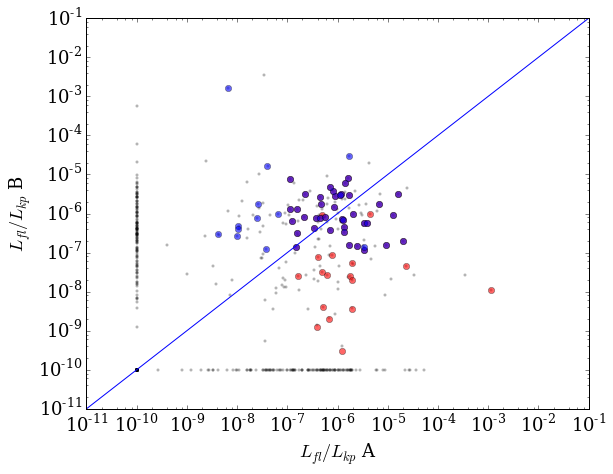

In [94]:
plt.figure(figsize=(9,7))
plt.plot(Lfl_Lbol[m][a][Good_both_a2], Lfl_Lbol[m][b][Good_both_a2], 'ro', alpha = 0.6)
plt.plot(Lfl_Lbol[m][a][Good_both_b2], Lfl_Lbol[m][b][Good_both_b2], 'bo', alpha = 0.6)
plt.scatter(Lfl_Lbol[m][a]+1e-10, Lfl_Lbol[m][b]+1e-10, s=5, c='k', alpha=0.2)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([1e-11,1], [1e-11,1])
# plt.plot([1e-11,1]*2, [1e-11,1]*2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$L_{fl}/L_{kp}$ A')
plt.ylabel('$L_{fl}/L_{kp}$ B')
plt.savefig('AB.png',dpi=500)

In [64]:
print(len(Lfl_Lbol[m][a][Good_both_a2]))
print(len(Lfl_Lbol[m][b][Good_both_b2]))

83
90


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


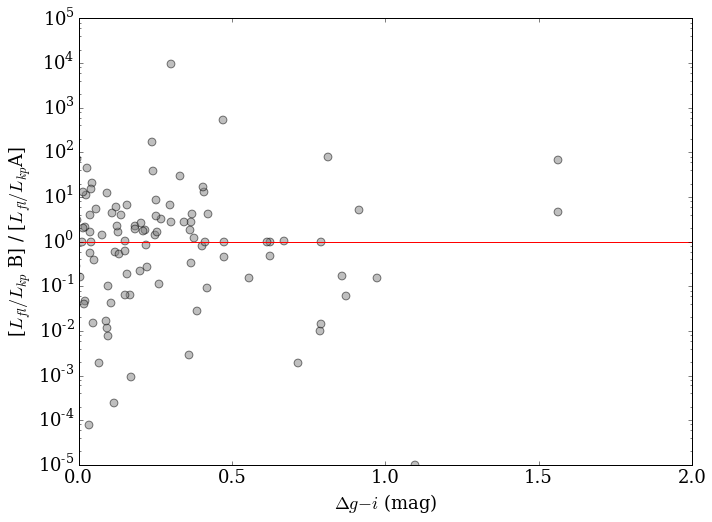

'Frac > 1 and Frac < 1'

In [65]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][b][Good_either] - giclr[m][a][Good_either],
            Lfl_Lbol[m][b][Good_either]/Lfl_Lbol[m][a][Good_either], 
            facecolor = '0.5',  alpha=0.5, s=60)
#plt.scatter(giclr[m][a][Good_both_a] - giclr[m][b][Good_both_a],Lfl_Lbol[m][a][Good_both_a]/Lfl_Lbol[m][b][Good_both_a], color = 'r', alpha=0.5, s=90)
#plt.scatter(giclr[m][a][Good_both_b] - giclr[m][b][Good_both_b],Lfl_Lbol[m][a][Good_both_b]/Lfl_Lbol[m][b][Good_both_b], color = 'b', alpha=0.5, s=90)
plt.xlim(0,2)
plt.ylim(1e-5,  1e5)
plt.plot([-2,2],[1e0,1e0], color = 'r')
#plt.plot([0,0],[1e-6,1e4], color = 'r')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta g-i$ (mag)')
plt.ylabel('[$L_{fl}/L_{kp}$ B] / [$L_{fl}/L_{kp}$A]')
plt.savefig('Color_Diagram_NEW', dpi=300)
plt.show()

"Frac > 1 and Frac < 1"

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


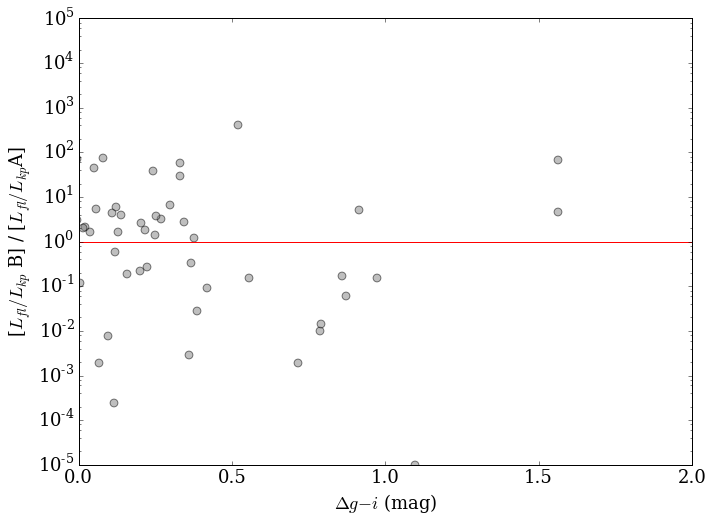

'Frac > 1 and Frac < 1'

In [66]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][b][Good_either2] - giclr[m][a][Good_either2],
            Lfl_Lbol[m][b][Good_either2]/Lfl_Lbol[m][a][Good_either2], 
            facecolor = '0.5',  alpha=0.5, s=60)
#plt.scatter(giclr[m][a][Good_both_a] - giclr[m][b][Good_both_a],Lfl_Lbol[m][a][Good_both_a]/Lfl_Lbol[m][b][Good_both_a], color = 'r', alpha=0.5, s=90)
#plt.scatter(giclr[m][a][Good_both_b] - giclr[m][b][Good_both_b],Lfl_Lbol[m][a][Good_both_b]/Lfl_Lbol[m][b][Good_both_b], color = 'b', alpha=0.5, s=90)
plt.xlim(0,2)
plt.ylim(1e-5,  1e5)
plt.plot([-2,2],[1e0,1e0], color = 'r')
#plt.plot([0,0],[1e-6,1e4], color = 'r')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta g-i$ (mag)')
plt.ylabel('[$L_{fl}/L_{kp}$ B] / [$L_{fl}/L_{kp}$A]')
plt.savefig('Color_Diagram_NEW', dpi=300)
plt.show()

"Frac > 1 and Frac < 1"

Edits to make:
1. Histogram of A[good]-star g-i color

2. Make one cut in median of A-star color distribution 

3. Remake g-i plot with two subpopulations with colored points: Red points: Redder A-stars; Blue points: Bluer A-stars

0.821


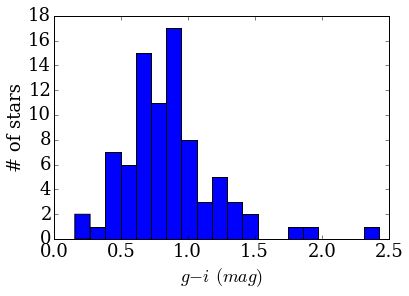

In [67]:
plt.hist(giclr[m][a][Good_both_a2], bins=20)
plt.ylabel('# of stars')
plt.xlabel('$g-i\,(mag)$')
plt.savefig('A-starClrHist')
print(np.median(giclr[m][a][Good_both_a2]))

In [93]:
gi_redcut= np.where(giclr[m][a][Good_either2] <= np.median(giclr[m][a][Good_either2]))
gi_bluecut= np.where(giclr[m][a][Good_either2] > np.median(giclr[m][a][Good_either2]))                    
print(np.median(giclr[m][a][Good_either2]))

0.777


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


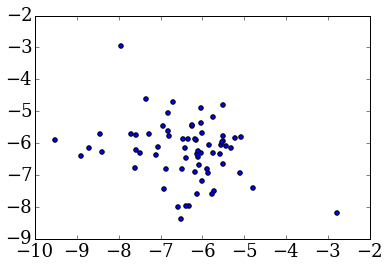

In [69]:
plt.scatter(np.log10(Lfl_Lbol[m][b][Good_either2]),np.log10(Lfl_Lbol[m][a][Good_either2]))

In [70]:
print((np.log10(Lfl_Lbol[m][b][Good_either2][gi_redcut],Lfl_Lbol[m][a][Good_either2][gi_redcut])))

[-6.82800689 -8.70426996 -2.78625852 -7.95085135 -7.59819316 -7.11758293
 -7.59117507 -5.57210087 -8.89922369 -8.40385865 -5.73037726 -6.90913005
 -7.26654836 -5.5034834  -6.93864504 -6.08001797 -6.23538012 -6.23538012
 -5.49928085 -6.86725052 -6.18425645 -6.38379254 -5.43531782 -5.32280959
 -9.52359747 -6.4915302  -5.51125358 -6.41629161 -6.12383119 -7.58516886
 -5.75519998 -8.43551688 -6.80736807 -5.76439702]


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


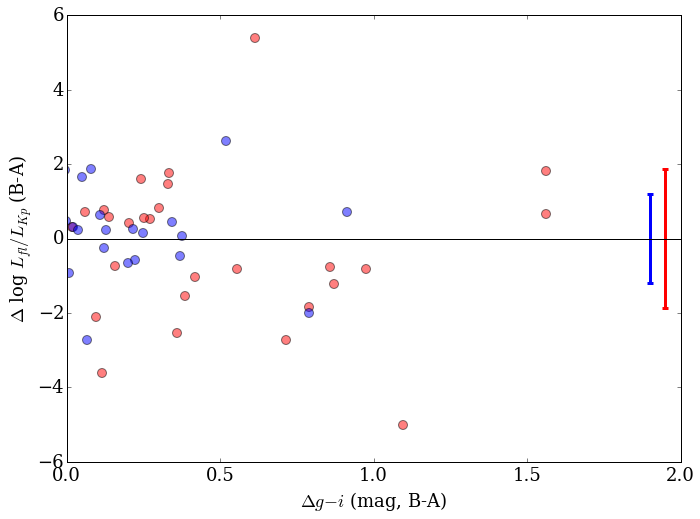

In [95]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][b][Good_either2][gi_redcut] - giclr[m][a][Good_either2][gi_redcut],
            np.log10(Lfl_Lbol[m][b][Good_either2][gi_redcut]/Lfl_Lbol[m][a][Good_either2][gi_redcut]), 
            c='r', alpha=0.5,s=80)

plt.scatter(giclr[m][b][Good_either2][gi_bluecut] - giclr[m][a][Good_either2][gi_bluecut],
            np.log10(Lfl_Lbol[m][b][Good_either2][gi_bluecut]/Lfl_Lbol[m][a][Good_either2][gi_bluecut]),
            c='b', alpha=0.5,s=80)
plt.xlim(0,2)
# plt.ylim(-5,  5)
plt.plot([-2,2],[0,0], color = 'k')
plt.xlabel('$\Delta g-i$ (mag, B-A)')
# plt.ylabel('[$L_{fl}/L_{kp}$ B] / [$L_{fl}/L_{kp}$A]')
plt.ylabel(r'$\Delta$ log $L_{fl}/L_{Kp}$ (B-A)' )
# plt.yscale('log')

redstd = np.std(np.log10(Lfl_Lbol[m][b][Good_either2][gi_redcut] / Lfl_Lbol[m][a][Good_either2][gi_redcut]))
plt.errorbar(1.95,0,redstd, color='r', ecolor='r', lw=3, mew=3)

bluestd = np.std(np.log10(Lfl_Lbol[m][b][Good_either2][gi_bluecut] / Lfl_Lbol[m][a][Good_either2][gi_bluecut]))
plt.errorbar(1.9,0,bluestd, color='b', ecolor='b', lw=3, mew=3)



plt.savefig('Color_diagram_v3', dpi=750)

In [72]:
print(len(Lfl_Lbol[m][b][Good_either2][gi_redcut]))
print(len(Lfl_Lbol[m][b][Good_either2][gi_bluecut]))

34
33


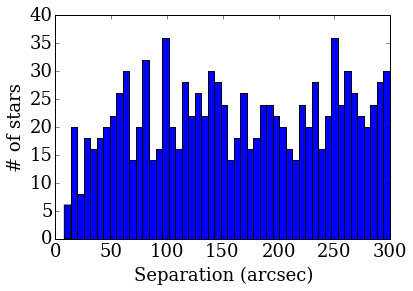

In [73]:
plt.hist(Pair_Dist, bins=50)
plt.xlabel('Separation (arcsec)')
plt.ylabel('# of stars')
plt.savefig('Pair Distances', dpi = 300)

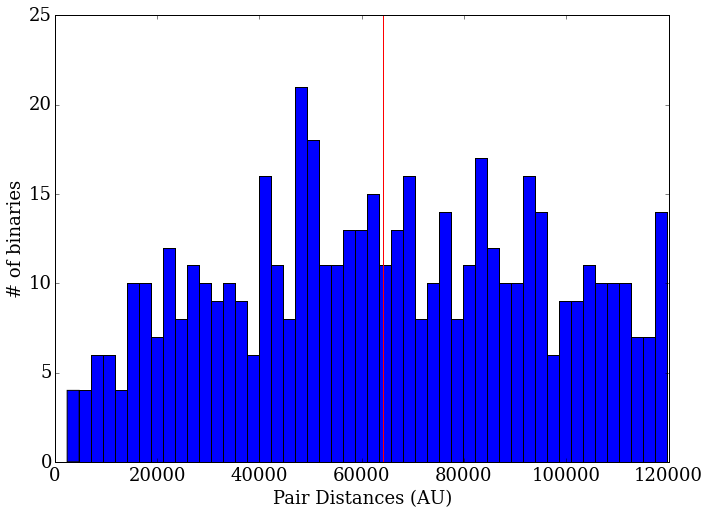

In [74]:
plt.figure(figsize=(11,8))
plt.hist((AU_dist[AU_cut]), bins = 50)
plt.plot([64088.9,64088.9],[0,25],'r')
plt.xlabel('Pair Distances (AU)')
plt.ylabel('# of binaries')
plt.savefig('AU_pairdist', dpi = 300)


In [75]:
n = np.where((Lfl_Lbol[m][a]/Lfl_Lbol[m][b] > 0.80) & (Lfl_Lbol[m][a]/Lfl_Lbol[m][b] < 1.2))
print(np.size(n))
print(n)

122
(array([  3,   9,  10,  15,  16,  19,  21,  28,  31,  32,  34,  39,  44,
        48,  49,  51,  52,  58,  59,  62,  73,  74,  75,  76,  89,  93,
        95,  97, 104, 105, 107, 109, 110, 111, 121, 128, 132, 138, 140,
       141, 148, 168, 172, 178, 179, 182, 190, 203, 207, 214, 222, 227,
       233, 237, 238, 239, 240, 248, 252, 261, 272, 274, 276, 279, 281,
       286, 292, 298, 303, 305, 306, 307, 308, 314, 315, 324, 326, 330,
       332, 335, 338, 343, 347, 362, 363, 366, 383, 386, 387, 388, 390,
       391, 393, 394, 399, 400, 406, 408, 415, 429, 435, 444, 448, 453,
       456, 464, 468, 473, 475, 483, 497, 499, 504, 506, 523, 524, 529,
       536, 543, 544, 545, 546]),)


In [79]:
for j in range (len(giclr)-1):
    if (j % 2 == 0) & (giclr[j] > giclr[j+1]): 
        giclr[j], giclr[j+1] = giclr[j+1], giclr[j]
        Lfl_Lbol[j], Lfl_Lbol[j+1] =  Lfl_Lbol[j+1], Lfl_Lbol[j]
       

In [80]:
print(giclr)
print(np.size(giclr))

[-0.087     0.265     0.613    ...,  0.622001  0.623     0.931   ]
207617


In [81]:
ag = np.arange(0,207616,2)
bg = np.arange(1,207617,2)

(-2, 4)

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


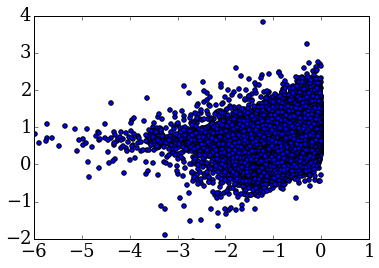

In [82]:
plt.scatter(giclr[ag]-giclr[bg],giclr[ag])
plt.xlim(-6,1)
plt.ylim(-2,4)

In [83]:
giclr[m]

array([ 0.764   ,  0.955   ,  2.27    , ...,  0.961   ,  0.733   ,
        1.661001])

In [84]:
for k in range (len(giclr[m])-1):
    if (k % 2 == 0) & (giclr[m][k] > giclr[m][k+1]): 
        giclr[m][k], giclr[m][k+1] = giclr[m][k+1], giclr[m][k]
         
       

In [85]:
print(giclr[m])
print(np.size(giclr[m]))


[ 0.764     0.955     2.27     ...,  0.961     0.733     1.661001]
1094


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


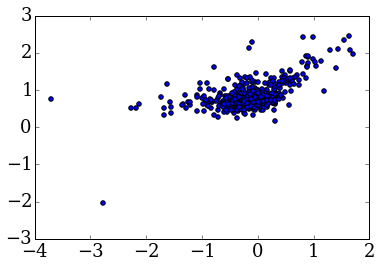

In [86]:
plt.scatter(giclr[m][a]-giclr[m][b],giclr[m][a])